# Payday Loans and economic inequality
In this script for the CFPB consumer complaint data, I am going to look at a somewhat contentious financial product: payday loans.

My hypothesis is that consumers of payday loans exhibit a different behaviour with regards to complaining, due to their economic status and not necessarily because the providers are delivering substantially better service to this category of customers.

First, loading up the packages and getting the data from the SQL file provided by Kaggle.

### Import Libraries

In [1]:
library(RSQLite)
library(DBI)
library(ggplot2)
library(data.table)
library(ggthemes)
library(scales)

Warning message:
"package 'RSQLite' was built under R version 3.6.3"
Warning message:
"package 'DBI' was built under R version 3.6.3"
Warning message:
"package 'ggplot2' was built under R version 3.6.3"
Warning message:
"package 'data.table' was built under R version 3.6.3"
Warning message:
"package 'ggthemes' was built under R version 3.6.3"
Warning message:
"package 'scales' was built under R version 3.6.3"


In [9]:
con <- dbConnect(SQLite(), "C:\\Users\\wikie\\Documents\\Datasets\\Consumer complaints\\database.sqlite")
x<- data.table(dbReadTable(con, "consumer_complaints"))
str(x)

Classes 'data.table' and 'data.frame':	555957 obs. of  18 variables:
 $ date_received               : chr  "08/30/2013" "08/30/2013" "08/30/2013" "08/30/2013" ...
 $ product                     : chr  "Mortgage" "Mortgage" "Credit reporting" "Student loan" ...
 $ sub_product                 : chr  "Other mortgage" "Other mortgage" NA "Non-federal student loan" ...
 $ issue                       : chr  "Loan modification,collection,foreclosure" "Loan servicing, payments, escrow account" "Incorrect information on credit report" "Repaying your loan" ...
 $ sub_issue                   : chr  NA NA "Account status" "Repaying your loan" ...
 $ consumer_complaint_narrative: chr  NA NA NA NA ...
 $ company_public_response     : chr  NA NA NA NA ...
 $ company                     : chr  "U.S. Bancorp" "Wells Fargo & Company" "Wells Fargo & Company" "Navient Solutions, Inc." ...
 $ state                       : chr  "CA" "CA" "NY" "MD" ...
 $ zipcode                     : chr  "95993" "91104" "1

#### The dataset has over 500,000 complaints in it, but how many are for payday loans compared to other financial products?

Warning message in grid.Call(C_stringMetric, as.graphicsAnnot(x$label)):
"font family not found in Windows font database"
Warning message in grid.Call(C_stringMetric, as.graphicsAnnot(x$label)):
"font family not found in Windows font database"
Warning message in grid.Call(C_stringMetric, as.graphicsAnnot(x$label)):
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Wi

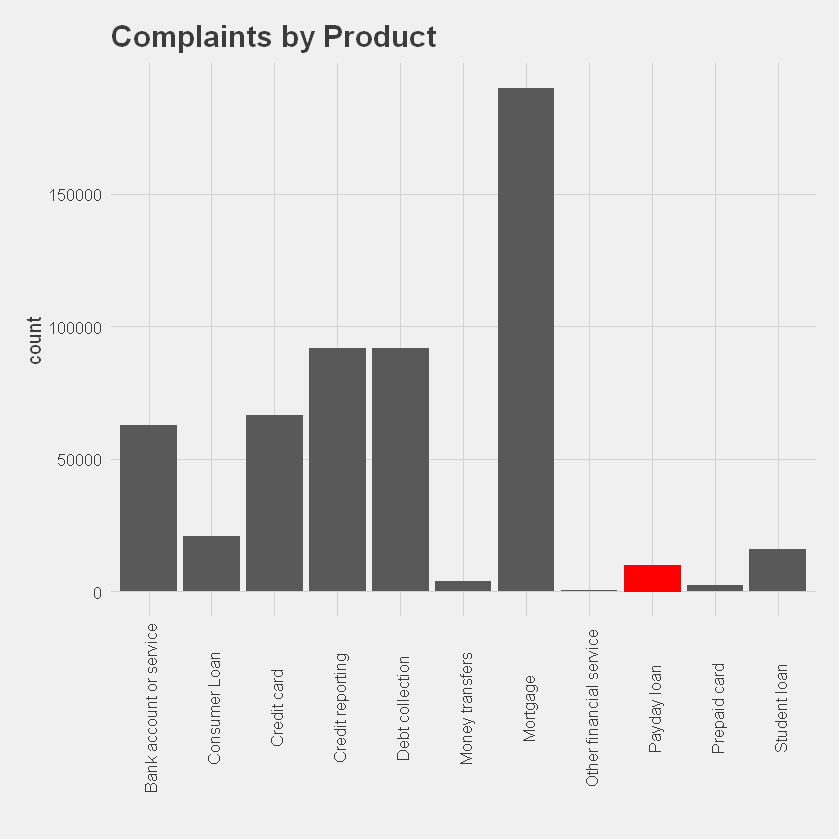

In [10]:
# take a copy of the product
x$product_cat <- x$product

#add payday loans from Debt collection category
x[product=="Debt collection" & sub_product=="Payday loan", product_cat:= "Payday loan"]

#could include pawn loans from Consumer Loan category, as well
#x[product=="Consumer Loan" & sub_product=="Pawn loan", product_cat:="Payday loan"]

#add mortgages from Debt collection category
x[product=="Debt collection" & sub_product=="Mortgage", product_cat:="Mortgage"]
ggplot(x, aes(x=product_cat)) +
  geom_bar() +
  geom_bar(data=x[product_cat=="Payday loan"], aes(product_cat), color= "red", fill="red") +
  ggtitle("Complaints by Product") + xlab("") +
  theme_fivethirtyeight() + scale_colour_fivethirtyeight() +
    theme(axis.title = element_text(family="Atlas Grotesk Regular"),
    axis.text.x=element_text(angle=90, vjust=.6),
    legend.position="bottom", legend.direction="horizontal",
    legend.title=element_blank(),
    plot.title=element_text(family="Atlas Grotesk Medium"),
    legend.text=element_text(family="Atlas Grotesk Regular"),
    text=element_text(family="DecimaMonoPro"))

In [11]:
x[, .N, by=product_cat][order(-N)]

product_cat,N
Mortgage,189908
Credit reporting,91854
Debt collection,91812
Credit card,66468
Bank account or service,62563
Consumer Loan,20990
Student loan,15839
Payday loan,9684
Money transfers,3812
Prepaid card,2470


Only 9684 complaints regarding payday loans to the CFPB, one of the fewest products in the data. 9684 payday loan complaints compared to 189,908 mortgage complaints; a quick internet search suggested in the neighborhood of 100+ million payday loans a year and about 10 million mortgages. This doesn’t make sense, considering the reputation of payday loans for gouging people. Let’s keep looking.

Does absense of complains signal exceptional customer service, or is there some confounding variable that prevents complains to surface up in the CFPB dataset? We’re going to look at the payday loans and compare them to the most common complaint category, namely, mortgages.

In [12]:
pd <- x[product_cat %in% c("Payday loan", "Mortgage")]

#### What issues do people have with payday loans?

Warning message in grid.Call(C_stringMetric, as.graphicsAnnot(x$label)):
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font fami

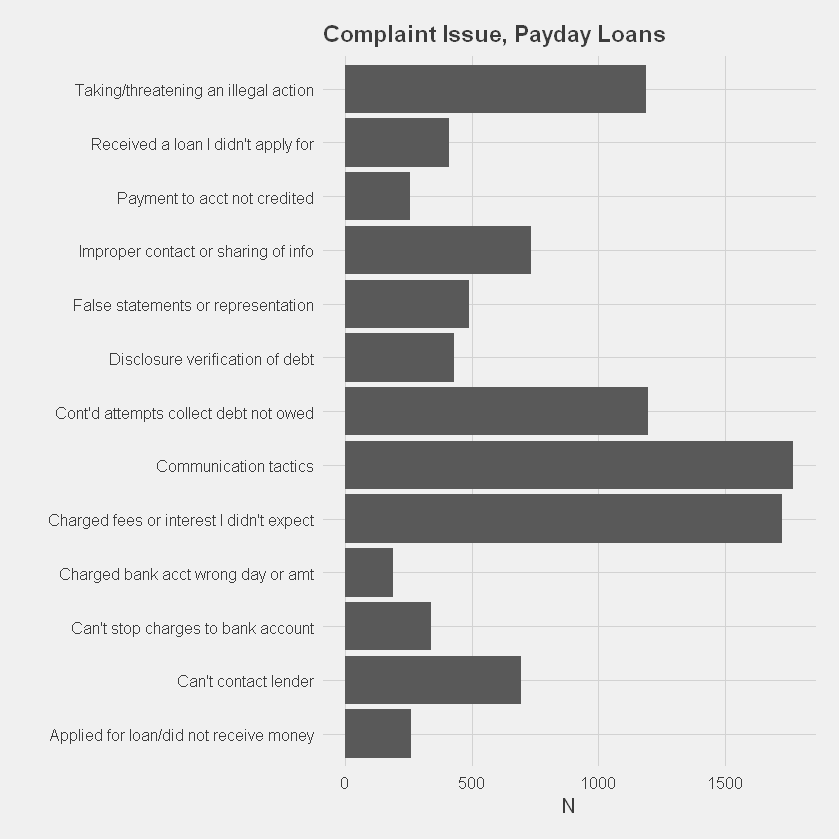

In [13]:
ggplot(pd[product_cat=="Payday loan"], aes(x=issue)) +
  geom_bar() +
  coord_flip() +
  ggtitle("Complaint Issue, Payday Loans") + xlab("") + ylab("N") +
  theme_fivethirtyeight() + scale_colour_fivethirtyeight() +
    theme(axis.title = element_text(family="Atlas Grotesk Regular"),
    legend.position="bottom", legend.direction="horizontal",
    legend.title=element_blank(),
    plot.title=element_text(family="Atlas Grotesk Medium", size=14),
    legend.text=element_text(family="Atlas Grotesk Regular"),
    text=element_text(family="DecimaMonoPro"))

#### What about the troubles experienced by mortgage holders?

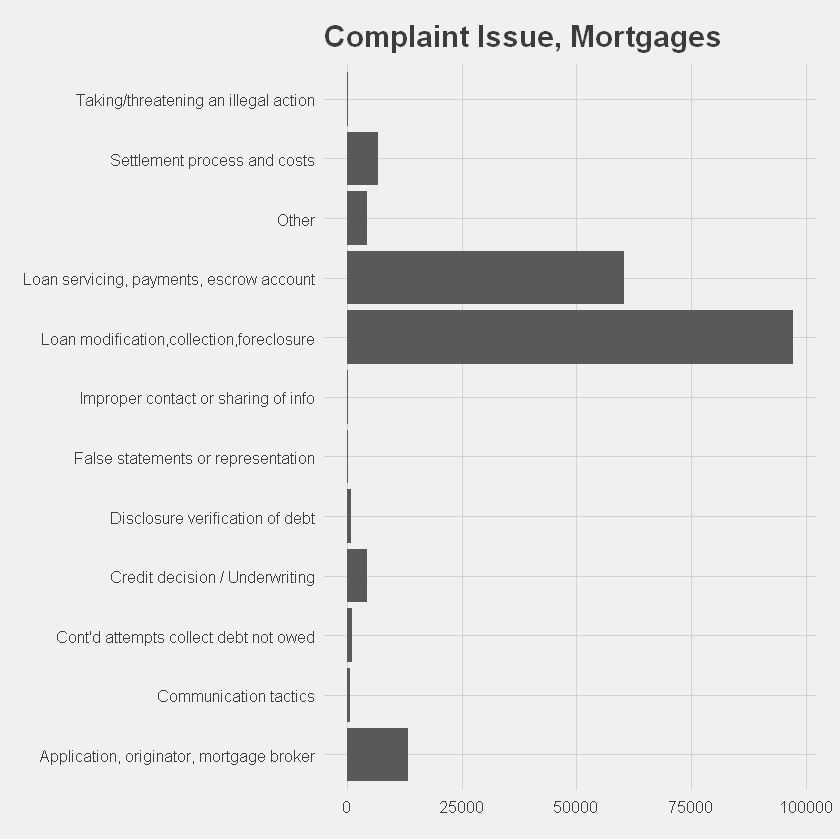

In [14]:
ggplot(pd[product_cat=="Mortgage"], aes(x=issue)) +
  geom_bar() +
  coord_flip() +
  ggtitle("Complaint Issue, Mortgages") + xlab("") + ylab("N") +
  theme_fivethirtyeight() + scale_colour_fivethirtyeight()

As you might expect, the biggest complaints related to payday loans are related to communication issues - threats, nagging, forced collection of debt or interest not owed or expected and other types of abuses.

The mortgage holders typically complain about services - in particular refinancing (loan modification/repayments), and sometimes about the agents.

What are some of the other ways in which these two categories of customers are different? Here are the tools two groups of customers use to communicate with the CFPB.

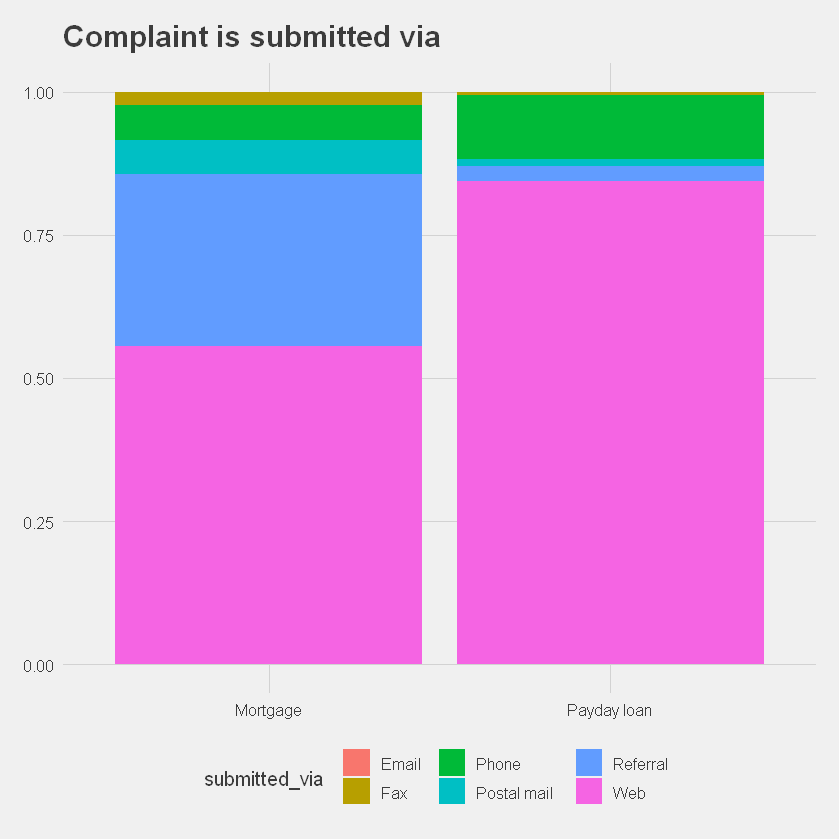

In [15]:
ggplot(pd, aes(x=product_cat, fill=submitted_via)) +
  geom_bar(position="fill") +
  ggtitle("Complaint is submitted via") + xlab("") + ylab("%") +
  theme_fivethirtyeight() + scale_colour_fivethirtyeight()



#### Personal stories
The web complaints are the the most interesting ones because they contain narratives. What do payday loan borrowers complain about?

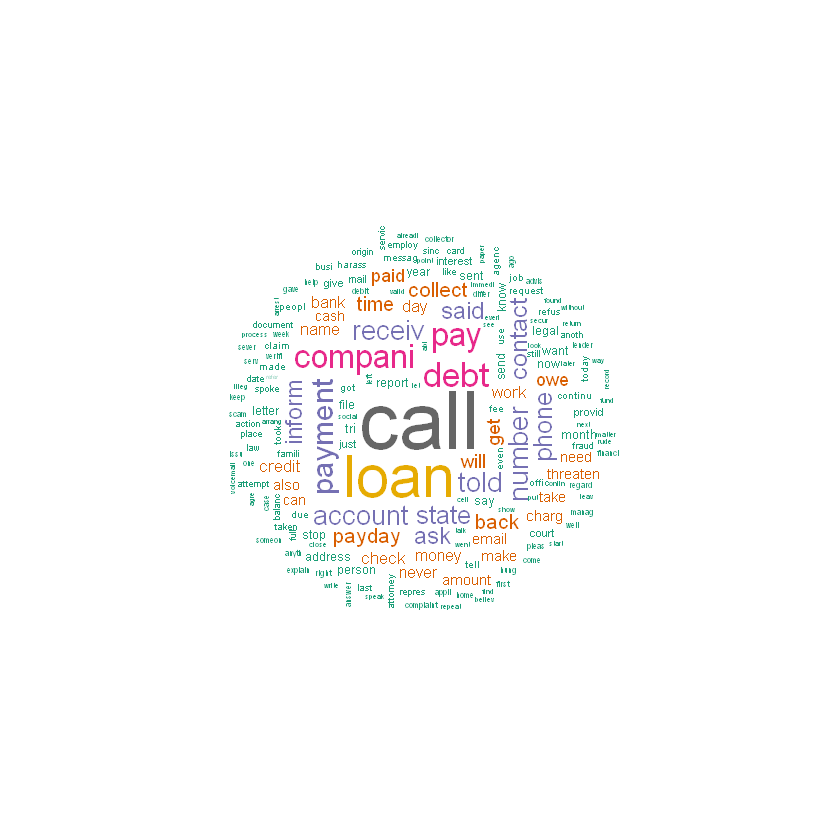

In [16]:
library(tm)
library(SnowballC)
library(wordcloud)
require(RColorBrewer)


pd_narrative <- pd[product_cat=="Payday loan"]$consumer_complaint_narrative

pd.corpus <- VCorpus(VectorSource(pd_narrative))
pd.corpus <- tm_map(pd.corpus, removePunctuation)
pd.corpus <- tm_map(pd.corpus, removeNumbers)
pd.corpus <- tm_map(pd.corpus, content_transformer(tolower))
pd.corpus <- tm_map(pd.corpus, removeWords, stopwords("english"))
pd.corpus <- tm_map(pd.corpus, stripWhitespace)
pd.corpus <- tm_map(pd.corpus, stemDocument)
pd.corpus <- tm_map(pd.corpus, function(x) removeWords(x, c("xxxx", "xxxxxxxx")))

pd.corpus <- tm_map(pd.corpus, PlainTextDocument)
pd.tdm <- TermDocumentMatrix(pd.corpus)
pd.tdm <- removeSparseTerms(pd.tdm, 0.99)
pd.m <- as.matrix(pd.tdm)
pd.v <- sort(rowSums(pd.m),decreasing=TRUE)
pd.d <- data.frame(word = names(pd.v),freq=pd.v)
#table(pd.d$freq)
pal2 <- brewer.pal(8,"Dark2")
#png("wordcloud_mortgages.png", width=1280,height=800, res=300)
wordcloud(pd.d$word,pd.d$freq, scale=c(4, .2),min.freq=50,
max.words=Inf, random.order=FALSE, rot.per=.15,colors=pal2)

               

In [22]:
dev.off()

null device 
          1

#### What are the troubles of the mortgage owners?

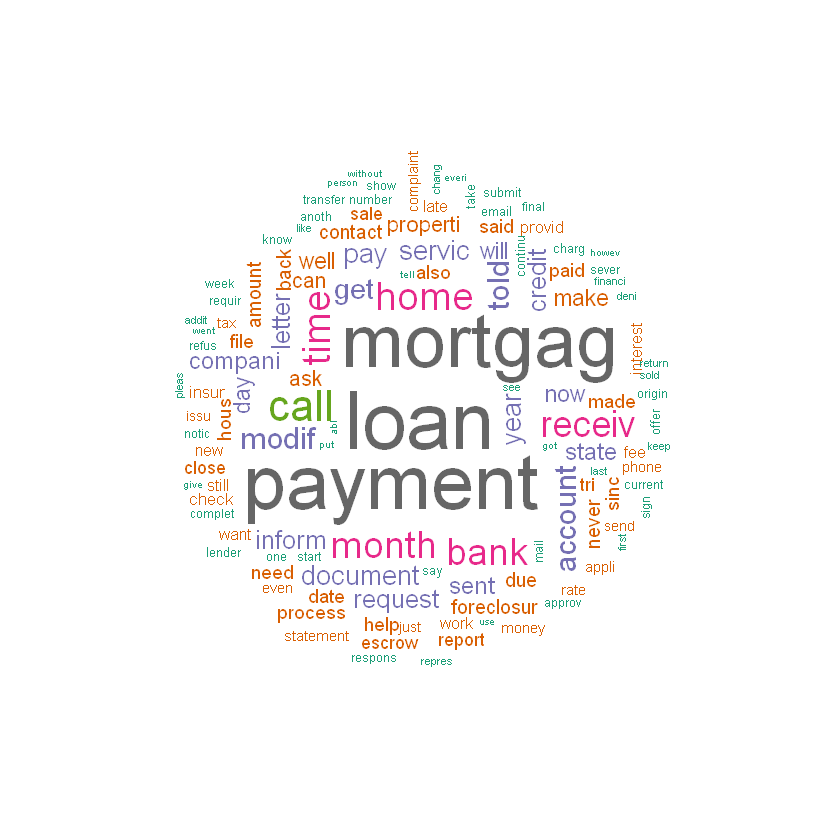

In [23]:
mtg_narrative <- pd[product_cat=="Mortgage"]$consumer_complaint_narrative

mtg.corpus <- VCorpus(VectorSource(mtg_narrative))
mtg.corpus <- tm_map(mtg.corpus, removePunctuation)
mtg.corpus <- tm_map(mtg.corpus, removeNumbers)
mtg.corpus <- tm_map(mtg.corpus, content_transformer(tolower))
mtg.corpus <- tm_map(mtg.corpus, removeWords, stopwords("english"))
mtg.corpus <- tm_map(mtg.corpus, stripWhitespace)
mtg.corpus <- tm_map(mtg.corpus, stemDocument)
mtg.corpus <- tm_map(mtg.corpus, function(x) removeWords(x, c("xxxx", "xxxxxxxx")))

mtg.corpus <- tm_map(mtg.corpus, PlainTextDocument)
mtg.tdm <- TermDocumentMatrix(mtg.corpus)
mtg.tdm <- removeSparseTerms(mtg.tdm, 0.99)
mtg.m <- as.matrix(mtg.tdm)
mtg.v <- sort(rowSums(mtg.m),decreasing=TRUE)
mtg.d <- data.frame(word = names(mtg.v),freq=mtg.v)
#table(mtg.d$freq)
pal2 <- brewer.pal(8,"Dark2")
#png("wordcloud_mortgages.png", width=1280,height=800, res=300)
wordcloud(mtg.d$word,mtg.d$freq, scale=c(4,.2),min.freq=50,
max.words=Inf, random.order=FALSE, rot.per=.15,colors=pal2)

In [21]:
dev.off()

null device 
          1

#### Dispute
Here are percentages of people who disputed the company’s decision in each of the two categories.

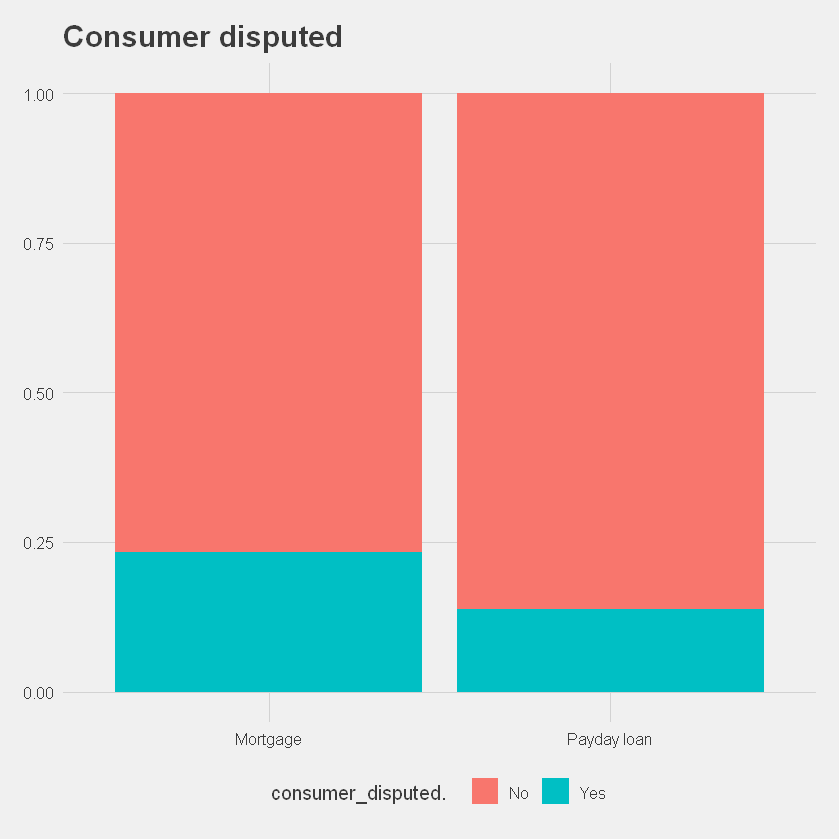

In [24]:
ggplot(pd, aes(x=product_cat, fill=consumer_disputed.)) +
  geom_bar(position="fill") +
  ggtitle("Consumer disputed") + xlab("") + ylab("%") +
  theme_fivethirtyeight() + scale_colour_fivethirtyeight()